In [1]:
#pip install -e .

In [2]:
import numpy as np
import NeuralNetworkLibrary as dnn
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split

np.random.seed(42)


# Main

In [3]:
def main():
    dnn.activationFunction()
    neural_network = dnn.NeuralNetwork(input_size = 2,
                                layer_sizes = [10,10],
                                output_size = 2,
                                activation_funcs = [dnn.Relu(),dnn.Relu(),dnn.Purelin()],
                                wInit = 'nguyen',
                                dropout_rate=0.05,
                                regularization='L2',
                                lambda_reg=1e-3)

    # Carga el archivo .mat
    data = loadmat('engine_dataset.mat')
    inputs = data['engineInputs'].T
    targets = data['engineTargets'].T
    inputs,targets = dnn.min_max(inputs,targets)
        
    X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    print(f"Original X: {np.size(inputs)} Y:{np.size(targets)}")
    print(f"Entrenamiento X: {np.size(X_train)} Y:{np.size(y_train)}")
    print(f"Testeo X: {np.size(X_test)} Y:{np.size(y_test)}")
    print(f"Valoracion X: {np.size(X_val)} Y:{np.size(y_val)}")
    #print("============= DATA BEFORE ================= ")
    #dnn.printData(inputs,targets)

    #print("============= DATA AFTER  =================")
    #dnn.printData(inputs,targets)
    
    Optimizador = dnn.RmsProp(nn=neural_network,
                          inputs=X_train,
                          targets=y_train,
                          test_inputs=X_test,
                          test_targets=y_test,
                          lr=1e-3,
                          maxEpochs=20000,
                          show=200,
                          consecutive_epochs=5,
                          mingrad=1e-8,
                          batch_size=250,
                          error_fun=dnn.ErrorFunctions.MSE)
    
    perfs,test_perfs,epochs = Optimizador.optimize()
    y_pred = neural_network.forwardPass(inputs=X_train,training=False)
    print(f"R2 Training = {dnn.ErrorFunctions.R2(y_train,y_pred)}")
    y_pred = neural_network.forwardPass(inputs=X_val,training=False)
    print(f"R2 Valoration= {dnn.ErrorFunctions.R2(y_val,y_pred)}")
    y_pred = neural_network.forwardPass(inputs=inputs,training=False)
    print(f"R2 All data= {dnn.ErrorFunctions.R2(targets,y_pred)}")
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, perfs, label='Train')
    plt.plot(epochs,test_perfs, label='Test')
    plt.title('Performance')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.legend()
    plt.show()

# DO MAIN

Original X: 2398 Y:2398
Entrenamiento X: 1534 Y:1534
Testeo X: 480 Y:480
Valoracion X: 384 Y:384


trainRMSPROP: Epoch  0 / 20000 , Performance 1.637e+01 / 1e-08 , Test Performance 1.390e+01 / 1e-08 , Gradient 1.160e+05 / 1e-08
trainRMSPROP: Epoch  200 / 20000 , Performance 4.537e-02 / 1e-08 , Test Performance 1.879e-02 / 1e-08 , Gradient 6.675e+01 / 1e-08
trainRMSPROP: Epoch  400 / 20000 , Performance 3.122e-02 / 1e-08 , Test Performance 1.379e-02 / 1e-08 , Gradient 6.190e+01 / 1e-08
trainRMSPROP: Epoch  486 / 20000 , Performance 3.410e-02 / 1e-08 , Test Performance 8.760e-03 / 1e-08 , Gradient 1.517e+02 / 1e-08

 trainRMSPROP : Performance has risen for 5 consecutive epochs 

R2 Training = [0.9607205  0.79483404]
R2 Valoration= [0.96371221 0.79480388]
R2 All data= [0.96096619 0.79454856]


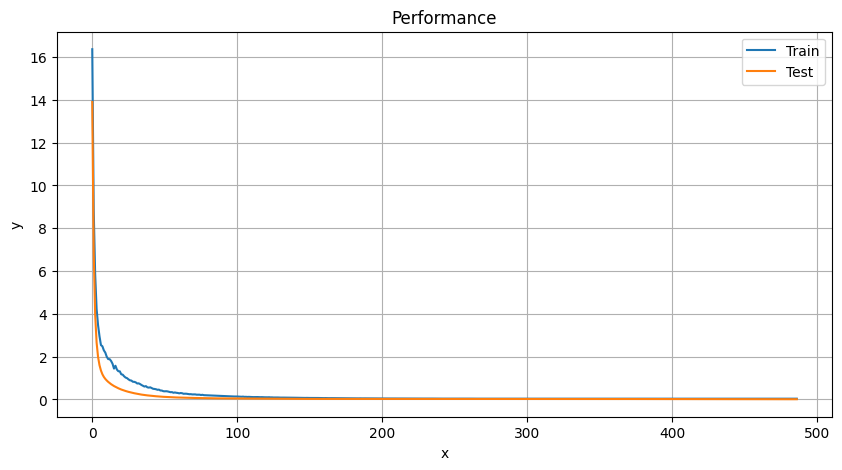

In [8]:
if __name__ == '__main__':
    main()